In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
deltas = {
    'neighborhood': {
      'speed': {
          'baseline': [0.0468, 0.0460, 0.0444],
          '0.125': [0.1105, 0.1117, 0.1092],
          '0.5': [0.4558, 0.4547, 0.4601],
          '2.0': [1.7594, 1.7599, 1.7598],
          '4.0': [3.6213, 3.6213, 3.6214]
      },
      'volume': {
          'baseline': [0.0011, -0.0019, 0.0005],
          '0.125': [0.1106, 0.1121, 0.1100],
          '0.5': [0.4415, 0.4432, 0.4449],
          '2.0': [1.7521, 1.7522, 1.7518]
      },
      'circuitousness': {
          'baseline': [-0.0022, -0.0036, -0.0024],
          '0.125': [0.0723, 0.0699, 0.0729],
          '0.5': [0.4217, 0.4223, 0.4251],
          '1.0': [0.7893, 0.7893, 0.7893]
      }
  },
  'neighborhood+perturb': {
      'speed': {
          'baseline': [0.0468, 0.0460, 0.0444],
          '0.125': [0.1189, 0.1180, 0.1177],
          '0.5': [0.4355, 0.4586, 0.4553],
          '2.0': [1.7897, 1.6662, 1.8093],
          '4.0': [3.4657, 3.7902, 3.3845]
      },
      'volume': {
          'baseline': [0.0011, -0.0019, 0.0005],
          '0.125': [0.1130, 0.1139, 0.1148],
          '0.5': [0.4535, 0.4434, 0.4568],
          '2.0': [1.8466, 1.8620, 1.8809]
      },
      'circuitousness': {
          'baseline': [-0.0022, -0.0036, -0.0024],
          '0.125': [0.0664, 0.0589, 0.06782],
          '0.5': [0.4207, 0.4389, 0.4343],
          '1.0': [0.7842, 0.7911, 0.7684]
      }
  },
  'gpt': {
      'speed': {
          '0.125': [-0.1216, -0.0821, -0.0692],
          '0.5': [0.0351, -0.0266, 0.0605],
          '2.0': [0.1916, 0.2228, 0.1845],
          '4.0': [0.294, 0.2879, 0.3005]
      },
      'volume': {
          '0.125': [0.0269, 0.0269, 0.0027],
          '0.5': [0.1457, 0.1739, 0.1315],
          '2.0': [1.8834, 1.7434, 1.6793]
      },
      'circuitousness': {
          '0.125': [0.0131, 0.0101, 0.0086],
          '0.5': [0.0054, 0.0109, 0.0102],
          '1.0': [0.0393, 0.0234, 0.0000]
      }
  },
  'ssd': {
      'speed': {
          '0.125': [0.39, 0.4332],
          '0.5': [0.3441, 0.3249],
          '2.0': [1.1232, 1.0647],
          '4.0': [1.0247, 1.0927]
      },
      'volume': {
          '0.125': [0.3836, 0.3536],
          '0.5': [0.2682, 0.299],
          '2.0': [0.6522, 0.6906]
      },
      'circuitousness': {
          '0.125': [0.076, 0.0744],
          '0.5': [0.0768, 0.0787],
          '1.0': [0.0559, 0.163]
      }
  },
  'mucoco': {
      'speed': {
          '0.125': [0.1809, 0.1719, 0.1549],
          '0.5': [0.8829, 0.8930, 0.8367],
          '2.0': [1.8948, 1.7950, 0.1884],
          '4.0': [3.6826, 3.6481, 3.4902]
      },
      'volume': {
          '0.125': [0.1382, 0.1421, 0.1461],
          '0.5': [0.5530, 0.5471, 0.5724],
          '2.0': [2.2121, 2.2271, 2.4901]
      },
      'circuitousness': {
          '0.125': [0.0681, 0.0657, 0.0687],
          '0.5': [-0.0007, 0.0105, 0.1655],
          '1.0': [0.0817, 0.0704, 0.0108]
      }
  },
  'prefix': {
      'speed': {
          '0.125': [0.1970, 0.2071, 0.1873],
          '0.5': [0.2494, 0.2799, 0.2041],
          '2.0': [1.5403, 1.5760, 1.5695]
      },
      'volume': {
          '0.125': [0.0960, 0.0879, 0.0812],
          '0.5': [0.8928, 0.8411, 0.8955]
      },
      'circuitousness': {
          '0.125': [-0.0123, -0.0151, 0.0161],
          '0.5': [0.1582, 0.1629, 0.1567]
      }
  }
}


In [3]:
bert_scores = {
    'neighborhood': {
      'speed': {
          '0.125': [0.9351, 0.9352, 0.9351],
          '0.5': [0.9340, 0.9344, 0.9342],
          '2.0': [0.9291, 0.9288, 0.9294],
          '4.0': [0.9188, 0.9190, 0.9187]
      },
      'volume': {
          '0.125': [0.9380, 0.9383, 0.9384],
          '0.5': [0.9320, 0.9322, 0.9321],
          '2.0': [0.9244, 0.9252, 0.9240]
      },
      'circuitousness': {
          '0.125': [0.9271, 0.9271, 0.9272],
          '0.5': [0.9109, 0.9100, 0.9112],
          '1.0': [0.9082, 0.9088, 0.9087]
      }
  },
  'neighborhood+perturb': {
      'speed': {
          '0.125': [0.9350, 0.9352, 0.9348],
          '0.5': [0.9386, 0.9389, 0.9382],
          '2.0': [0.9281, 0.9272, 0.9277],
          '4.0': [0.9230, 0.9218, 0.9238]
      },
      'volume': {
          '0.125': [0.9351, 0.9355, 0.9351],
          '0.5': [0.9314, 0.9318, 0.9311],
          '2.0': [0.9208, 0.9214, 0.9213]
      },
      'circuitousness': {
          '0.125': [0.9306, 0.9307, 0.9306],
          '0.5': [0.9089, 0.9088, 0.9095],
          '1.0': [0.8354, 0.8351, 0.8350]
      }
  },
  'gpt': {
      'speed': {
          '0.125': [0.9140, 0.9105, 0.9056],
          '0.5': [0.9188, 0.9182, 0.9190],
          '2.0': [0.9196, 0.9153, 0.9129],
          '4.0': [0.9069, 0.9026, 0.9037]
      },
      'volume': {
          '0.125': [0.9122, 0.9168, 0.9137],
          '0.5': [0.9169, 0.9171, 0.9135],
          '2.0': [0.8880, 0.8851, 0.8870],
      },
      'circuitousness': {
          '0.125': [0.8947, 0.8873, 0.8869],
          '0.5': [0.8819, 0.8828, 0.8785],
          '1.0': [0.8383, 0.8423, 0.8152],
      }
  },
  'ssd': {
      'speed': {
          '0.125': [0.8413, 0.8407],
          '0.5': [0.8404, 0.8404],
          '2.0': [0.8223, 0.8238],
          '4.0': [0.8212, 0.8210]
      },
      'volume': {
          '0.125': [0.8355, 0.8352],
          '0.5': [0.8334, 0.8333],
          '2.0': [0.8249, 0.8243]
      },
      'circuitousness': {
          '0.125': [0.8462, 0.8464],
          '0.5': [0.8394, 0.8396],
          '1.0': [0.8111, 0.8326]
      }
  },
  'mucoco': {
      'speed': {
          '0.125': [0.6449, 0.6225, 0.7049],
          '0.5': [0.7293, 0.7981, 0.7512],
          '2.0': [0.509, 0.6761, 0.5278],
          '4.0': [0.7234, 0.7238, 0.7382]
      },
      'volume': {
          '0.125': [0.6569, 0.6681, 0.6848],
          '0.5': [0.6205, 0.7340, 0.6974],
          '2.0': [0.5176, 0.6135, 0.7152]
      },
      'circuitousness': {
          '0.125': [0.7335, 0.7365, 0.7496],
          '0.5': [0.4990, 0.5418, 0.6641],
          '1.0': [0.4176, 0.6786, 0.5611]
      }
  },
  'prefix': {
      'speed': {
          '0.125': [0.8942, 0.8934, 0.8973],
          '0.5': [0.8908, 0.9044, 0.9164],
          '2.0': [0.8955, 0.8910, 0.8863]
      },
      'volume': {
          '0.125': [0.8918, 0.8569, 0.8881],
          '0.5': [0.8951, 0.8884, 0.9187]
      },
      'circuitousness': {
          '0.125': [0.889, 0.8904, 0.8842],
          '0.5': [0.8762, 0.8397, 0.8339]
      }
  }
}

In [4]:
bleu_scores = {
    'neighborhood': {
      'speed': {
          '0.125': [0.3399, 0.3398, 0.3402],
          '0.5': [0.3276, 0.3271, 0.3277],
          '2.0': [0.3051, 0.3046, 0.3059],
          '4.0': [0.2463, 0.2467, 0.2459]
      },
      'volume': {
          '0.125': [0.3296, 0.3299, 0.3288],
          '0.5': [0.2682, 0.2685, 0.2680],
          '2.0': [0.2869, 0.2874, 0.2870]
      },
      'circuitousness': {
          '0.125': [0.2483, 0.2486, 0.2487],
          '0.5': [0.2680, 0.2684, 0.2679],
          '1.0': [0.2479, 0.2476, 0.2479]
      }
  },
  'neighborhood+perturb': {
      'speed': {
          '0.125': [0.3261, 0.3257, 0.3264],
          '0.5': [0.3123, 0.3124, 0.3130],
          '2.0': [0.2944, 0.2949, 0.2952],
          '4.0': [0.2736, 0.2719, 0.2722]
      },
      'volume': {
          '0.125': [0.3038, 0.3038, 0.3036],
          '0.5': [0.2653, 0.2651, 0.2649],
          '2.0': [0.2518, 0.2511, 0.2531]
      },
      'circuitousness': {
          '0.125': [0.2902, 0.2902, 0.2902],
          '0.5': [0.2755, 0.2758, 0.2759],
          '1.0': [0.1622, 0.1618, 0.1624]
      }
  },
  'gpt': {
      'speed': {
          '0.125': [0.2114, 0.2691, 0.2197],
          '0.5': [0.2620, 0.2757, 0.2458],
          '2.0': [0.3467, 0.3228, 0.2922],
          '4.0': [0.2289, 0.2307, 0.2156],
      },
      'volume': {
          '0.125': [0.2127, 0.2100, 0.2344],
          '0.5': [0.3033, 0.3048, 0.3047],
          '2.0': [0.1996, 0.2047, 0.2048],
      },
      'circuitousness': {
          '0.125': [0.1955, 0.1560, 0.1935],
          '0.5': [0.1971, 0.1785, 0.1862],
          '1.0': [0.1692, 0.1526, 0.1442],
      }
  },
  'ssd': {
      'speed': {
          '0.125': [0.3173, 0.3346],
          '0.5': [0.3285, 0.3210],
          '2.0': [0.2871, 0.2693],
          '4.0': [0.2171, 0.2187]
      },
      'volume': {
          '0.125': [0.2558, 0.2560],
          '0.5': [0.2428, 0.2455],
          '2.0': [0.2227, 0.2198]
      },
      'circuitousness': {
          '0.125': [0.3143, 0.3220],
          '0.5': [0.2471, 0.2366],
          '1.0': [0.2501, 0.2573]
      }
  },
  'mucoco': {
      'speed': {
          '0.125': [0.2371, 0.2499, 0.2534],
          '0.5': [0.2319, 0.2314, 0.2759],
          '2.0': [0.2095, 0.2778, 0.2120],
          '4.0': [0.2840, 0.2818, 0.2841]
      },
      'volume': {
          '0.125': [0.3208, 0.3161, 0.3185],
          '0.5': [0.2944, 0.2857, 0.3135],
          '2.0': [0.2377, 0.2693, 0.2753]
      },
      'circuitousness': {
          '0.125': [0.3297, 0.3270, 0.3071],
          '0.5': [0.2729, 0.2773, 0.2861],
          '1.0': [0.2624, 0.2813, 0.2775]
      }
  },
  'prefix': {
      'circuitousness': {
          '0.125': [0.2396, 0.2913, 0.2745],
          '0.5': [0.2271, 0.2546, 0.2577]
      },
      'speed': {
          '0.125': [0.2253, 0.2697, 0.1986],
          '0.5': [0.2124, 0.2324, 0.2051],
          '2.0': [0.231, 0.2464, 0.2122]
      },
      'volume': {
          '0.125': [0.2239, 0.2064, 0.2416],
          '0.5': [0.2326, 0.2742, 0.2596]
          }
      }
}

In [5]:
num_samples = {
    'speed': {
        'baseline': 5845493,
        '0.125': 700949,
        '0.5': 468942,
        '2.0': 24858,
        '4.0': 733
    },
    'volume': {
        'baseline': 5845493,
        '0.125': 1023350,
        '0.5': 466369,
        '2.0': 2518,
    },
    'circuitousness': {
        'baseline': 5845493,
        '0.125': 511095,
        '0.5': 33777,
        '1.0': 130
    }
}

In [6]:
# def get_mae_deltas(d, error=False):
#   mae_deltas = {}
#   for k, v in d.items():
#     new_v = {}
#     for fk, fv in v.items():
#       if fk == 'baseline': continue

#       if error:
#         new_v[fk] = 100 * abs(float(fk) - float(fv)) / float(fk)
#       else:
#         new_v[fk] = fv
#     mae_deltas[k] = new_v
#   return mae_deltas

# maes = [get_mae_deltas(result, error=True) for result in deltas.values()]

# mae_p_deltas = get_mae_deltas(p_deltas)

def get_mae_deltas(d, error=False):
  mae_deltas = {}
  for k, v in d.items():
    new_v = {}
    for fk, fv in v.items():
      if fk == 'baseline': continue

      if error:
        new_v[fk] = [100 * abs(float(fk) - float(fv_i)) / float(fk) for fv_i in fv]
      else:
        new_v[fk] = fv
    mae_deltas[k] = new_v
  return mae_deltas

maes = [get_mae_deltas(result, error=True) for result in deltas.values()]


In [46]:
markers = ["," , "o" , "v" , "^" , "<", ">", "."]
colors = ['r','g','b','c','m', 'y', 'k']
models = ['CEV-LM (N-only)', 'CEV-LM', 'GPT-3', 'SSD-LM', 'MuCoCO', 'PrefixTuning']

def plot_by_feat(ax, values, feature, log_scale=False, legend=True, yaxis_title=""):
  l = None
  data = []
  for i, val in enumerate(values):
    feat_deltas = val[feature]

    # Get the keys for the x-axis
    keys = list(feat_deltas.keys())

    # Get the values for each set of bars
    deltas_values = list(feat_deltas.values()) # [[], [], [], []]

    # TODO: remove once results are filled
    l = min(len(deltas_values), l) if l else len(deltas_values)
    deltas_values = deltas_values[:l]
    keys = keys[:l]

    # if log_scale:
    #   deltas_values = list(map(math.log10, deltas_values))
    # keys = keys[:l]

    # data += list(zip(keys, deltas_values, [models[i]] * l))
    for j, delta_value in enumerate(deltas_values):
        d_value = delta_value
        if log_scale:
          d_value = list(map(math.log10, delta_value))

        for value in d_value:
          if j == len(keys) or i == len(models): break
          data.append((keys[j], value, models[i]))


  # Create a DataFrame from the data
  df = pd.DataFrame(data, columns=['feature', 'percent_error', 'model'])

  # Create the scatter plot using Seaborn
  # ax.figure(figsize=(5,10))
  sns.set(style='whitegrid')
  # g = sns.scatterplot(data=df, x='feature', y='percent_error', ax=ax, hue='model', style='model', palette=sns.color_palette("muted"), s=100)
  g = sns.pointplot(
      data=df,
      x='feature',
      y='percent_error',
      ax=ax,
      hue='model',
      dodge=0.5, # horizontal spacing
      palette=sns.color_palette("muted"),
      linestyles='',
      capsize=0.05
    )

  [ax.axvline(x, color = 'lightgray', linestyle='--') for x in [0.5, 1.5, 2.5]]
  # Add a legend
  # plt.legend(loc='upper right')
  if legend:
    ax.legend(title='Models', bbox_to_anchor=(1.02, 1), loc='upper left', fancybox=True, shadow=True, borderaxespad=0)
  else:
    g.legend_.remove()

  # Add a title and labels for the x and y axes
  ax.set_title(f'{feature.title()}' + (' (log scale)' if log_scale else ''))
  ax.set_xlabel(f'Target Delta') #{feature.title()}
  if yaxis_title:
    ax.set_ylabel(yaxis_title)
  else:
    ax.set_ylabel(None)




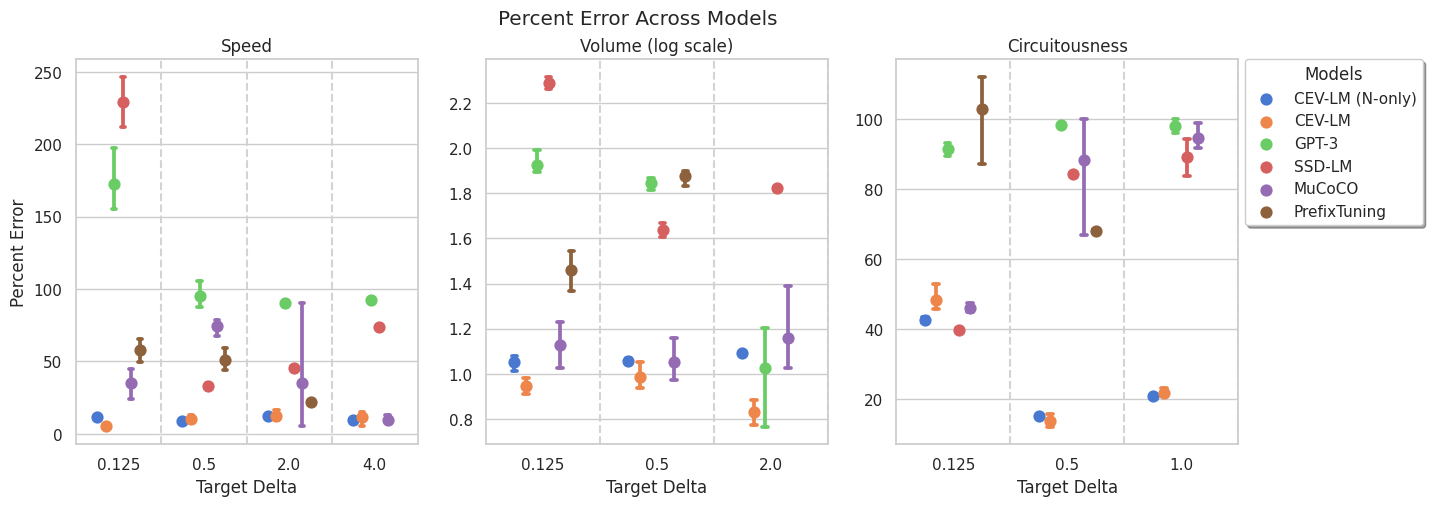

In [47]:


fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Percent Error Across Models')

for i, feature in enumerate(['speed', 'volume', 'circuitousness']):
  plot_by_feat(
      axs[i],
      maes,
      feature,
      log_scale=(feature == 'volume'),
      # log_scale=True,
      legend=(feature == 'circuitousness'),
      yaxis_title=("Percent Error" if not i else None)
  )

# Show the plot
# plt.show()
plt.savefig("delta_comps.pdf" , format='pdf', bbox_inches='tight')

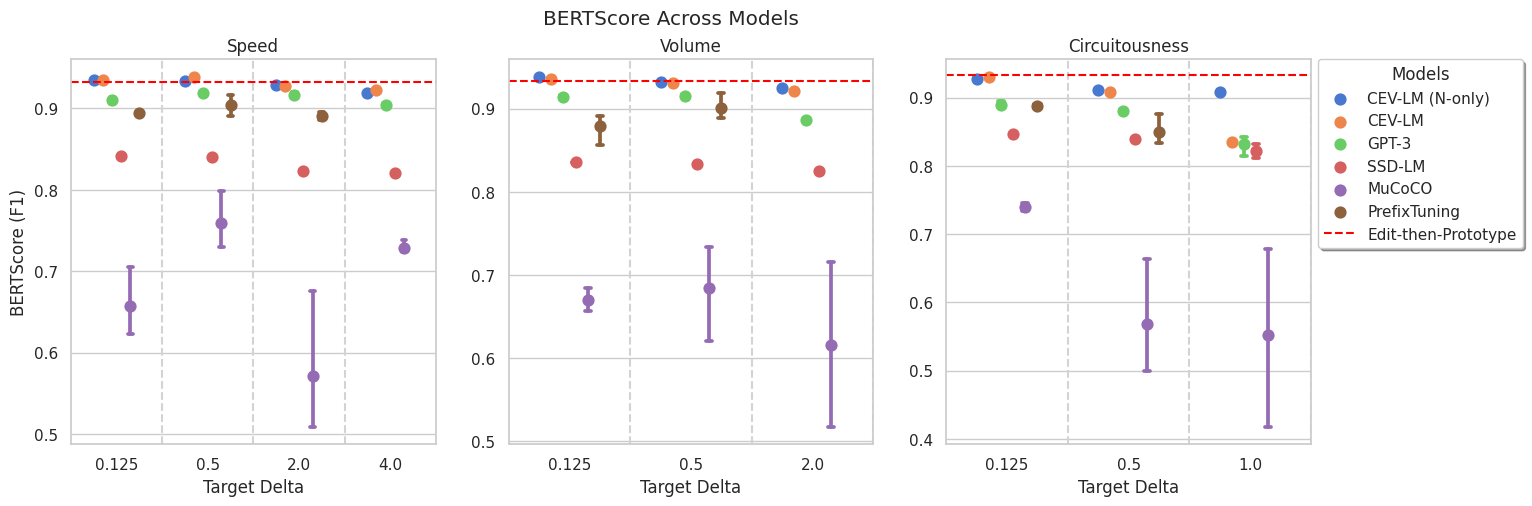

In [48]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(16)
fig.suptitle('BERTScore Across Models')

for i, feature in enumerate(['speed', 'volume', 'circuitousness']):
  plot_by_feat(
      axs[i],
      list(bert_scores.values()),
      feature,
      log_scale=False,
      legend=(feature == 'circuitousness'),
      yaxis_title=('BERTScore (F1)' if not i else None)
    )
  axs[i].axhline(y=0.9327, c='red', linestyle='dashed', label="Edit-then-Prototype")
# Show the plot

labels = models + ["Edit-then-Prototype"]
handles, _ = axs[-1].get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(title='Models', handles = handles, labels = labels, bbox_to_anchor=(1.02, 1), loc='upper left', fancybox=True, shadow=True, borderaxespad=0)

# plt.show()
plt.savefig("bert_comps.pdf", format='pdf', bbox_inches='tight')

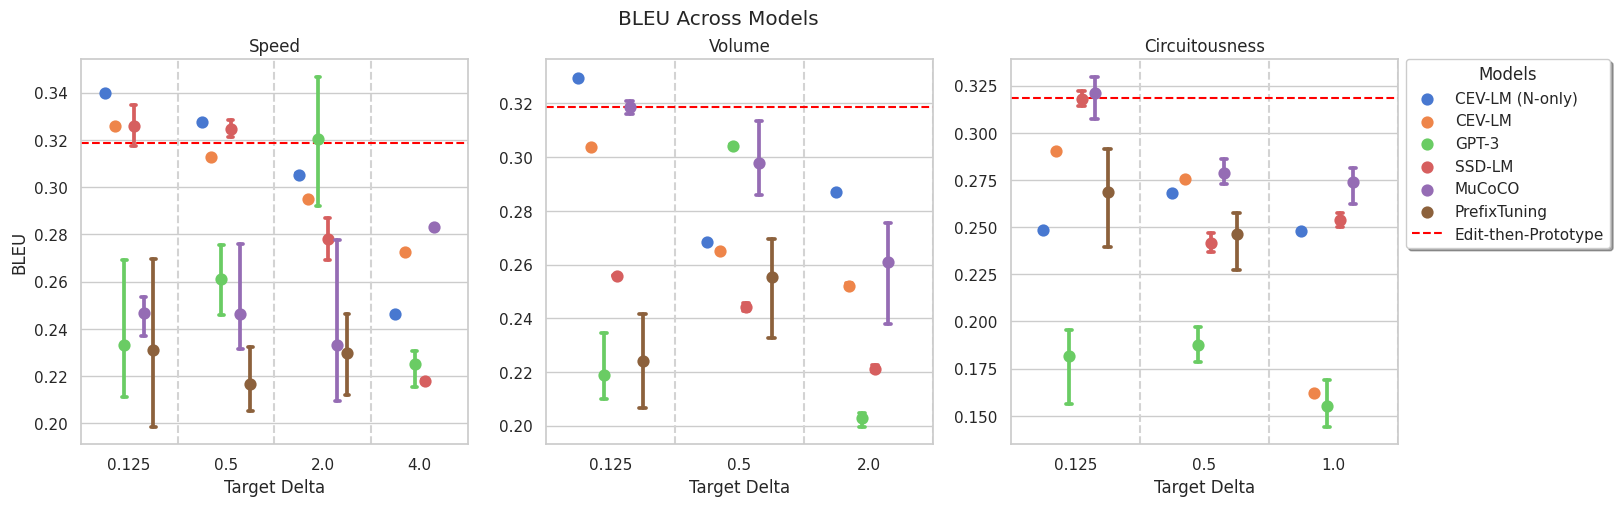

In [49]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(17)
fig.suptitle('BLEU Across Models')

for i, feature in enumerate(['speed', 'volume', 'circuitousness']):
  plot_by_feat(
      axs[i],
      list(bleu_scores.values()),
      feature,
      log_scale=False,
      legend=(feature == 'circuitousness'),
      yaxis_title=('BLEU' if not i else None)
    )
  axs[i].axhline(y=0.3185, c='red', linestyle='dashed', label="Edit-then-Prototype")
# Show the plot

labels = models + ["Edit-then-Prototype"]
handles, _ = axs[-1].get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(title='Models',handles = handles, labels = labels, bbox_to_anchor=(1.02, 1), loc='upper left', fancybox=True, shadow=True, borderaxespad=0)
# plt.show()
plt.savefig("bleu_comps.pdf", format='pdf', bbox_inches='tight')

In [11]:
samples_df = []
for i, mae in enumerate(maes[:2]): # only take neighborhood and neighborhood + perturb
  for feature in ['speed', 'volume', 'circuitousness']:
    for delta in list(mae[feature].keys()):
      n_samples = num_samples[feature][delta]
      percent_error = mae[feature][delta]

      samples_df.append({
          'Model': 'CEV-LM (N-only)' if not i else 'CEV-LM',
          'Feature': feature,
          'Target Delta': delta,
          'Error': sum(percent_error) / 3,
          'Num Samples': n_samples
      })

samples_df = pd.DataFrame(samples_df)

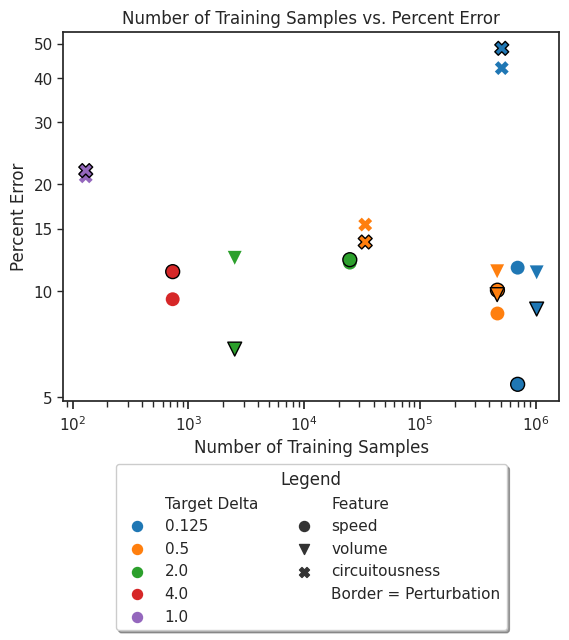

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

# Define the marker mapping for different features
marker_mapping = {"speed": "o", "volume": "v", "circuitousness": "X"}

# Set the style of the plot
# sns.set_style("whitegrid")
sns.set_style('ticks')

# Create the scatter plot
axs = sns.scatterplot(
    data=samples_df[samples_df['Model'] == 'CEV-LM (N-only)'],
    x='Num Samples',
    y='Error',
    hue='Target Delta',
    style='Feature',
    markers=marker_mapping,
    palette=sns.color_palette("tab10", 5),
    linewidth=0,
    s=100
)

axs.plot([], [], ' ', label="Border = Perturbation")

# Create the scatter plot
sns.scatterplot(
    data=samples_df[samples_df['Model'] == 'CEV-LM'],
    x='Num Samples',
    y='Error',
    hue='Target Delta',
    style='Feature',
    markers=marker_mapping,
    palette=sns.color_palette("tab10", 5),
    linewidth=1,
    edgecolor='black',
    s=100,
    legend=False,
    ax=axs
)

# Set the legend properties
legend = plt.legend(
    title='Legend',
    markerscale=1.2,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.17),
    fancybox=True,
    shadow=True,
    borderaxespad=0,
    ncol=2
)

legend.get_title().set_fontsize('12')

plt.loglog()
# plt.xscale('log')
# plt.yscale('log')

# axs.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

# This works but no gridlines
locs = np.append( np.arange(0,20,5),np.arange(20,60,10))
axs.yaxis.set_minor_locator(ticker.FixedLocator(locs))
axs.yaxis.set_major_locator(ticker.NullLocator())
axs.yaxis.set_minor_formatter(ticker.ScalarFormatter())
# ==========================

# Add labels and title to the plot
plt.xlabel('Number of Training Samples')
plt.ylabel('Percent Error')
plt.title('Number of Training Samples vs. Percent Error')

# axs.set_axisbelow(True)
# axs.yaxis.grid(color='gray', linestyle='dashed')
# plt.grid(which='major', axis='y', zorder=-1.0)


# plt.rcParams["axes.grid.axis"] ="y"
# plt.rcParams["axes.grid"] = True
# Display the plot
# plt.show()
# plt.grid()
plt.savefig("samples_vs_error.pdf", format='pdf', bbox_inches='tight')

In [13]:

def plot_by_feat_old(feature):
  feat_deltas = mae_deltas[feature]
  # feat_p_deltas = mae_p_deltas[feature]

  # Get the keys for the x-axis
  keys = list(feat_deltas.keys())

  # Get the values for each set of bars
  deltas_values = list(feat_deltas.values())
  # p_deltas_values = list(feat_p_deltas.values())

  # TODO: remove once results are filled
  l = min(len(deltas_values), len(p_deltas_values))
  deltas_values = deltas_values[:l]
  # p_deltas_values = p_deltas_values[:l]
  keys = keys[:l]

  # # Set the width of each bar
  # bar_width = 0.35

  # # Set the positions of the bars on the x-axis
  # r1 = np.arange(len(deltas_values))
  # r2 = [x + bar_width for x in r1]

  # # Create the bar plots
  # plt.bar(r1, deltas_values, color='blue', width=bar_width, label='Deltas')
  # plt.bar(r2, p_deltas_values, color='orange', width=bar_width, label='P Deltas')

  # # Add xticks and labels
  # plt.xticks([r + bar_width/2 for r in range(len(deltas_values))], keys)

  plt.scatter(keys, deltas_values, color='blue', label='Deltas')
  # plt.scatter(keys, p_deltas_values, color='orange', label='P Deltas')

  # Add a legend
  plt.legend()

  # Add a title and labels for the x and y axes
  plt.title(f'{feature.title()} Deltas vs P Deltas')
  plt.xlabel(f'{feature.title()}')
  plt.ylabel('Percent error')

  # Show the plot
  plt.show()